In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/Mobile.csv")
df.head().T

,0,1,2,3,4
UserID,1000001,1000002,1000003,1000004,1000005
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468


In [5]:
df.shape

(10652, 17)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,10652.0,1.005575e+06,3381.953331,1000001.0,1002663.75,1005326.5,1008484.25,1011760.0
Yearly_avg_view_on_travel_page,10071.0,2.806878e+02,68.604222,35.0,231.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,10271.0,2.821372e+04,14491.041876,3570.0,16285.00,28210.0,40670.00,252430.0
Yearly_avg_comment_on_travel_page,10446.0,7.450297e+01,24.305226,3.0,57.00,74.0,92.00,815.0
total_likes_on_outofstation_checkin_received,10652.0,6.563464e+03,4739.701522,1009.0,2945.75,4967.5,8394.25,20065.0
week_since_last_outstation_checkin,10652.0,3.224934e+00,2.628021,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,10652.0,2.889692e+01,51.084242,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,10652.0,2.705595e+00,1.080931,1.0,2.00,3.0,4.00,4.0
Adult_flag,10652.0,7.968457e-01,0.854243,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,10652.0,1.383740e+01,9.159876,0.0,8.00,12.0,18.00,270.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10652 non-null  int64  
 1   Taken_product                                 10652 non-null  object 
 2   Yearly_avg_view_on_travel_page                10071 non-null  float64
 3   preferred_device                              10599 non-null  object 
 4   total_likes_on_outstation_checkin_given       10271 non-null  float64
 5   yearly_avg_Outstation_checkins                10577 non-null  object 
 6   member_in_family                              10652 non-null  object 
 7   preferred_location_type                       10621 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10652 non-null 

In [8]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [9]:
 #Fill the numerical missing values with mean and categorical with mode

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [10]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [11]:
dfc=df.copy()
dfc

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,1011754,No,247.0,Mobile,11418.0,5,3,Historical site,99.0,9983,1,No,28,No,2,0,16
10648,1011755,No,210.0,Tab,40886.0,5,3,Other,53.0,3024,2,No,32,No,4,0,14
10649,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
10650,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12


In [12]:
#Convert every  'preferred_device' other than Mobile to Mobile

dfc['preferred_device'] = dfc['preferred_device'].apply(lambda x: 'Mobile' if x != 'Mobile' else x)

In [13]:
dfc['preferred_device'].value_counts()

preferred_device
Mobile    10652
Name: count, dtype: int64

In [14]:
dfc['preferred_device']=dfc['preferred_device'].replace({'Mobile':1})

In [15]:
dfc['Taken_product']=dfc['Taken_product'].replace({'Yes':1})
dfc['Taken_product']=dfc['Taken_product'].replace({'No':0})

In [16]:
dfc['working_flag']=dfc['working_flag'].replace({'Yes':1})
dfc['working_flag']=dfc['working_flag'].replace({'No':0})

In [17]:
dfc['working_flag'].value_counts()

working_flag
0    9028
1    1624
Name: count, dtype: int64

In [18]:
dfc['following_company_page']=dfc['following_company_page'].replace({'Yes':1})
dfc['following_company_page']=dfc['following_company_page'].replace({'No':0})

In [19]:
dfc['following_company_page'].value_counts()

following_company_page
0    7694
1    2941
1      12
0       5
Name: count, dtype: int64

In [20]:
print('Feature: Preferred location type')
print(pd.Categorical(dfc['preferred_location_type'].unique()))
print(pd.Categorical(dfc['preferred_location_type'].unique()).codes)
dfc['preferred_location_type'] = pd.Categorical(dfc['preferred_location_type']).codes

Feature: Preferred location type
['Financial', 'Other', 'Medical', 'Game', 'Social media', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 15
Categories (15, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ...,
                          'Social media', 'Tour  Travel', 'Tour and Travel', 'Trekking']
[ 3 10  7  4 11  2 13  8  9 12  0  6  1 14  5]


In [21]:
dfc['preferred_location_type'] = dfc['preferred_location_type'].replace({1: 1, 0: 0})

In [22]:
print('Feature: Following Company Page')
print(pd.Categorical(dfc['following_company_page'].unique()))
print(pd.Categorical(dfc['following_company_page'].unique()).codes)
dfc['following_company_page'] = pd.Categorical(dfc['following_company_page']).codes

Feature: Following Company Page
[1, 0, '1', '0']
Categories (4, object): [0, 1, '0', '1']
[1 0 3 2]


In [23]:
print('Feature: Yearly Avg Outstation Checkins')
print(pd.Categorical(dfc['yearly_avg_Outstation_checkins'].unique()))
print(pd.Categorical(dfc['yearly_avg_Outstation_checkins'].unique()).codes)
dfc['yearly_avg_Outstation_checkins'] = pd.Categorical(dfc['yearly_avg_Outstation_checkins']).codes

Feature: Yearly Avg Outstation Checkins
['1', '24', '23', '27', '16', ..., '9', '7', '6', '8', '4']
Length: 30
Categories (30, object): ['*', '1', '10', '11', ..., '6', '7', '8', '9']
[ 1 17 16 20  8  7 19 11 14  3  2 18  4 10 22 15  6 13 21  9  5  0 25 12
 23 29 27 26 28 24]


In [24]:
print('Feature: Member in Family')
print(pd.Categorical(dfc['member_in_family'].unique()).categories)
print(pd.Categorical(dfc['member_in_family'].unique()).codes)
dfc['member_in_family'] = pd.Categorical(dfc['member_in_family']).codes

Feature: Member in Family
Index(['1', '10', '2', '3', '4', '5', 'Three'], dtype='object')
[2 0 4 6 3 5 1]


In [25]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10652 non-null  int64  
 1   Taken_product                                 10652 non-null  int64  
 2   Yearly_avg_view_on_travel_page                10652 non-null  float64
 3   preferred_device                              10652 non-null  int64  
 4   total_likes_on_outstation_checkin_given       10652 non-null  float64
 5   yearly_avg_Outstation_checkins                10652 non-null  int8   
 6   member_in_family                              10652 non-null  int8   
 7   preferred_location_type                       10652 non-null  int8   
 8   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10652 non-null 

In [26]:
dfc.shape

(10652, 17)

In [27]:
from scipy.stats import zscore

In [28]:
X= dfc.drop(["Taken_product"],axis=1)
Y= dfc["Taken_product"]

In [29]:
X.head()

,UserID,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,307.0,1,38570.0,1,2,3,94.0,5993,8,1,11,0,1,0,8
1,1000002,367.0,1,9765.0,1,0,3,61.0,5130,1,0,23,1,4,1,10
2,1000003,277.0,1,48055.0,1,2,10,92.0,2090,6,1,15,0,2,0,7
3,1000004,247.0,1,48720.0,1,4,3,56.0,2909,1,1,11,0,3,0,8
4,1000005,202.0,1,20685.0,1,0,7,40.0,3468,9,0,12,0,4,1,6


In [30]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Taken_product, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [32]:
Y_train.shape

(7456,)

In [33]:
Y_test.shape

(3196,)

In [34]:
X_test.shape

(3196, 16)

In [35]:
X_train.shape

(7456, 16)

## **CART**

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Initialising a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [38]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                                out_file=ld_Tree_File,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [40]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.217203
total_likes_on_outstation_checkin_given       0.205732
Yearly_avg_view_on_travel_page                0.105367
week_since_last_outstation_checkin            0.071513
travelling_network_rating                     0.060036
member_in_family                              0.057882
following_company_page                        0.051818
Adult_flag                                    0.050928
Yearly_avg_comment_on_travel_page             0.047305
Daily_Avg_mins_spend_on_traveling_page        0.036706
yearly_avg_Outstation_checkins                0.033346
preferred_location_type                       0.024044
working_flag                                  0.015768
montly_avg_comment_on_company_page            0.014432
UserID                                        0.007921
preferred_device                              0.000000


In [41]:
y_predict = dt_model.predict(X_test)

In [42]:
y_predict.shape

(3196,)

In [43]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [44]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [45]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


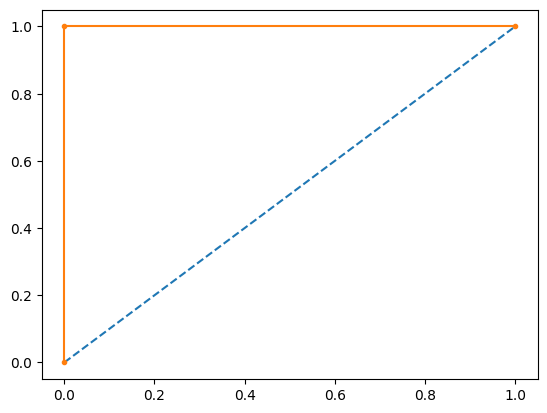

In [48]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.932


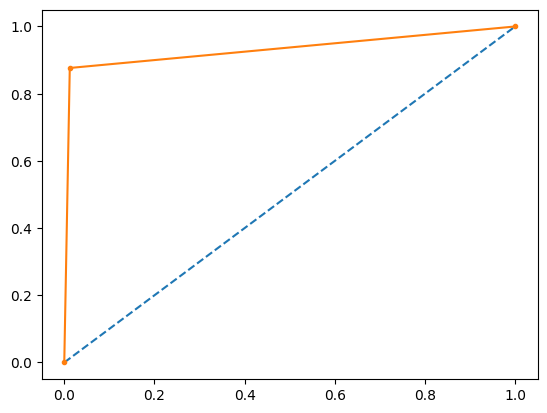

In [49]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
confusion_matrix(Y_train, ytrain_predict)

array([[6330,    0],
       [   0, 1126]])

In [52]:
#Train Data Accuracy
dt_model.score(X_train,Y_train)

1.0

In [53]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [54]:
confusion_matrix(Y_test, ytest_predict)

array([[2669,   33],
       [  61,  433]])

In [55]:
#Test Data Accuracy
dt_model.score(X_test,Y_test)

0.9705882352941176

In [56]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.93      0.88      0.90       494

    accuracy                           0.97      3196
   macro avg       0.95      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196



### **Tuning the data**

In [57]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [58]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [59]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.293973
total_likes_on_outstation_checkin_given       0.188279
following_company_page                        0.124956
Adult_flag                                    0.104234
Yearly_avg_view_on_travel_page                0.077531
week_since_last_outstation_checkin            0.073781
Daily_Avg_mins_spend_on_traveling_page        0.039157
member_in_family                              0.036008
travelling_network_rating                     0.025961
working_flag                                  0.017177
yearly_avg_Outstation_checkins                0.013084
Yearly_avg_comment_on_travel_page             0.004792
montly_avg_comment_on_company_page            0.001069
UserID                                        0.000000
preferred_device                              0.000000
preferred_location_type                       0.000000


In [60]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [61]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [62]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [0.99401198, 0.00598802],
       [0.84864865, 0.15135135],
       ...,
       [0.96965866, 0.03034134],
       [0.61428571, 0.38571429],
       [0.84864865, 0.15135135]])

In [64]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.994012,0.005988
2,0.848649,0.151351
3,0.848649,0.151351
4,0.978903,0.021097


AUC: 0.906


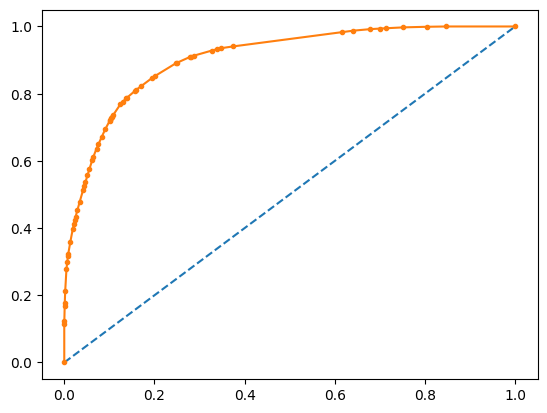

In [65]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.882


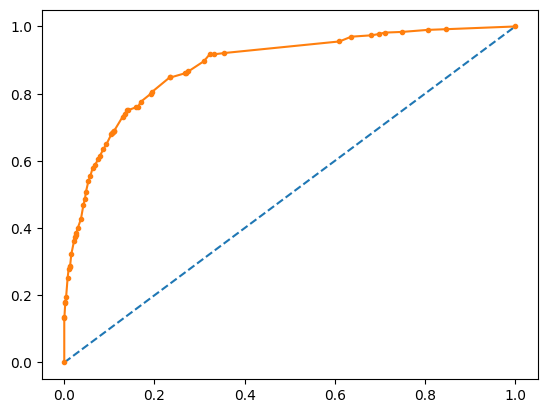

In [66]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
confusion_matrix(Y_train, ytrain_predict)

array([[6197,  133],
       [ 662,  464]])

In [69]:
#Train Data Accuracy
reg_dt_model.score(X_train,Y_train)

0.8933744635193133

In [70]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6330
           1       0.78      0.41      0.54      1126

    accuracy                           0.89      7456
   macro avg       0.84      0.70      0.74      7456
weighted avg       0.88      0.89      0.88      7456



In [71]:
confusion_matrix(Y_test, ytest_predict)

array([[2639,   63],
       [ 310,  184]])

In [72]:
#Test Data Accuracy
reg_dt_model.score(X_test,Y_test)

0.8832916145181476

In [73]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.74      0.37      0.50       494

    accuracy                           0.88      3196
   macro avg       0.82      0.67      0.72      3196
weighted avg       0.87      0.88      0.87      3196



## **SMOTE**

In [74]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [75]:
##shape after SMOTE
X_train_res.shape

(12660, 16)

In [76]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [77]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [78]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [79]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [0.99401198, 0.00598802],
       [0.84864865, 0.15135135],
       ...,
       [0.96965866, 0.03034134],
       [0.61428571, 0.38571429],
       [0.84864865, 0.15135135]])

In [81]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.994012,0.005988
2,0.848649,0.151351
3,0.848649,0.151351
4,0.978903,0.021097


AUC: 0.906


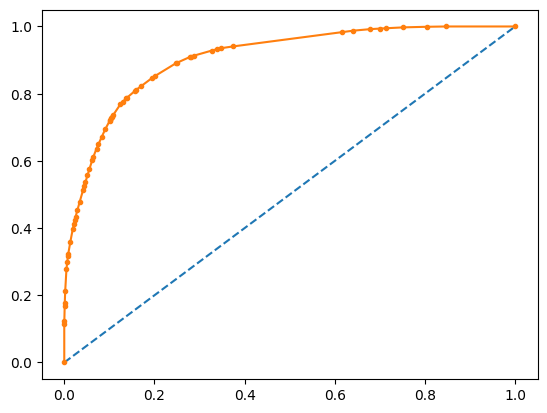

In [82]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.882


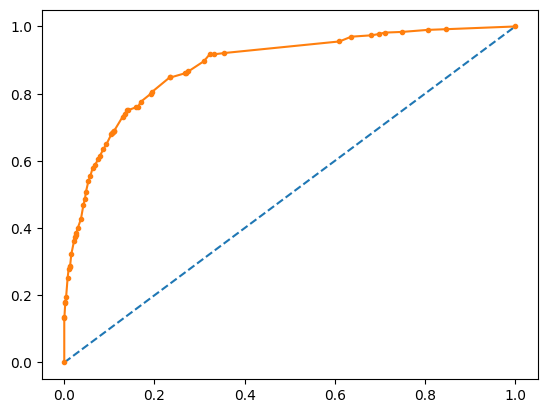

In [83]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
confusion_matrix(Y_train, ytrain_predict)

array([[6197,  133],
       [ 662,  464]])

In [86]:
#Train Data Accuracy
reg_dt_model.score(X_train,Y_train)

0.8933744635193133

In [87]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6330
           1       0.78      0.41      0.54      1126

    accuracy                           0.89      7456
   macro avg       0.84      0.70      0.74      7456
weighted avg       0.88      0.89      0.88      7456



In [88]:
confusion_matrix(Y_test, ytest_predict)

array([[2639,   63],
       [ 310,  184]])

In [89]:
#Test Data Accuracy
reg_dt_model.score(X_test,Y_test)

0.8832916145181476

In [90]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.74      0.37      0.50       494

    accuracy                           0.88      3196
   macro avg       0.82      0.67      0.72      3196
weighted avg       0.87      0.88      0.87      3196



## **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, Y_train)

In [92]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, Y_train)
print(model_score)

1.0


In [93]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)

0.9696495619524406


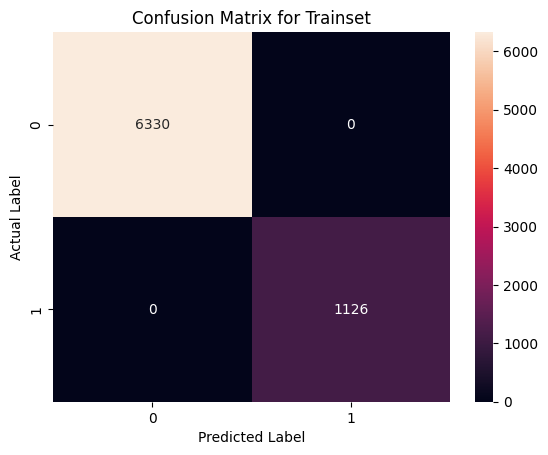

In [94]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,RF_train_predict)
sns.heatmap(confusion_matrix(Y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [95]:
print(classification_report(Y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



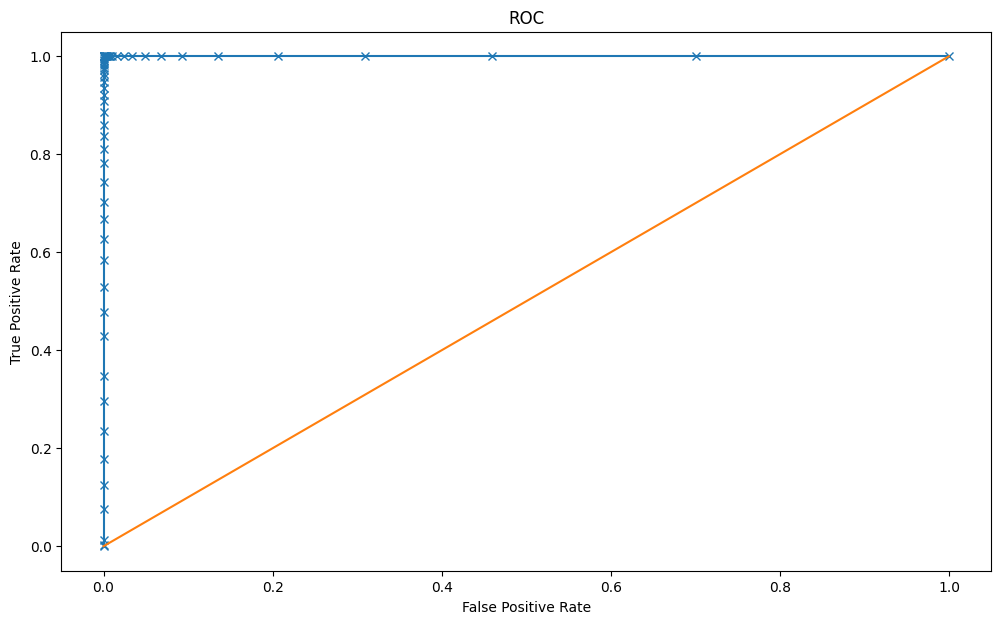

Area under Curve is 1.0


In [96]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,RF_model.predict_proba(X_train)[:,1]))

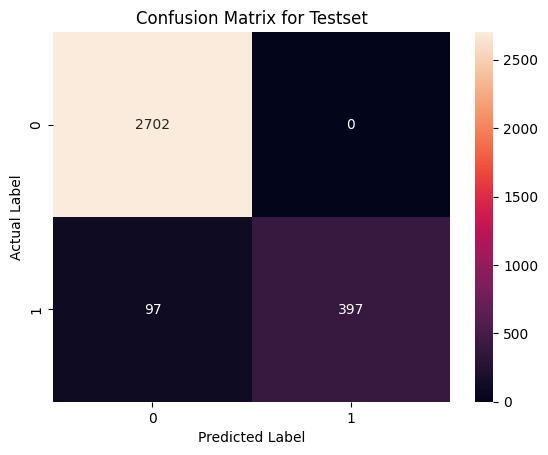

In [97]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,RF_test_predict)
sns.heatmap(confusion_matrix(Y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [98]:
print(classification_report(Y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       1.00      0.80      0.89       494

    accuracy                           0.97      3196
   macro avg       0.98      0.90      0.94      3196
weighted avg       0.97      0.97      0.97      3196



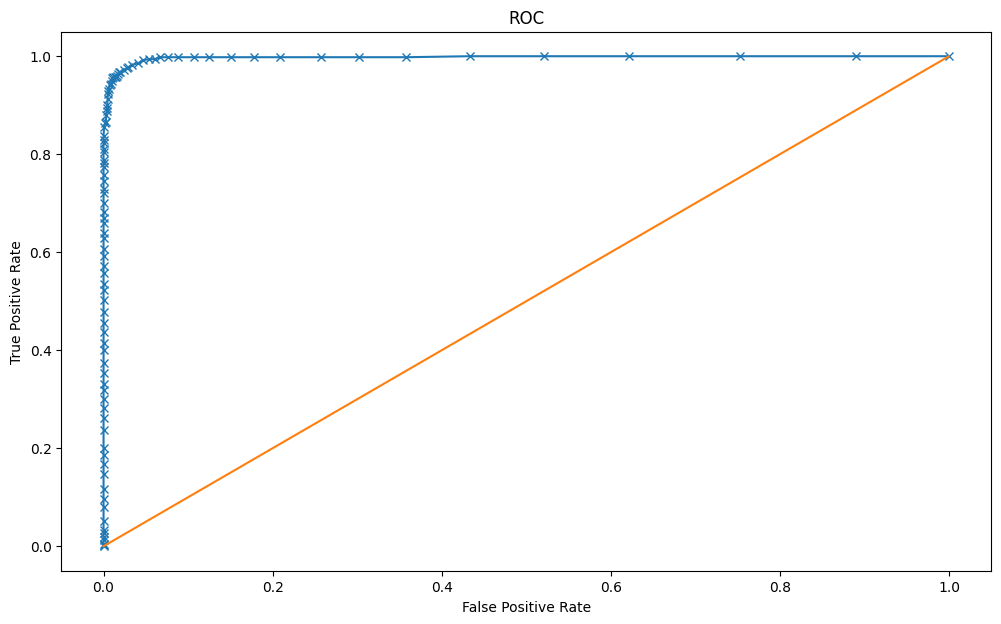

Area under Curve is 0.9973647500576871


In [99]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,RF_model.predict_proba(X_test)[:,1]))

In [100]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, Y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, Y_train)
print(model_score)

1.0


In [101]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)

0.9696495619524406


**Random Forest by Grid Search**  

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [104]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [185]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [186]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [187]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto',
                       n_estimators=1000)

In [188]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

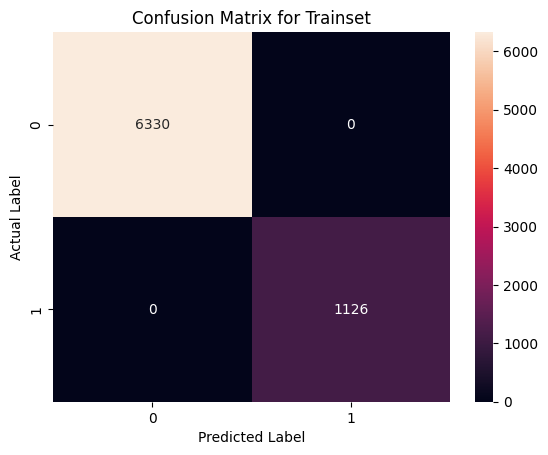

In [189]:
#Confusion Matrix for Test set
confusion_matrix(Y_train,RF_train_predict)
sns.heatmap(confusion_matrix(Y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [190]:
print(classification_report(Y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



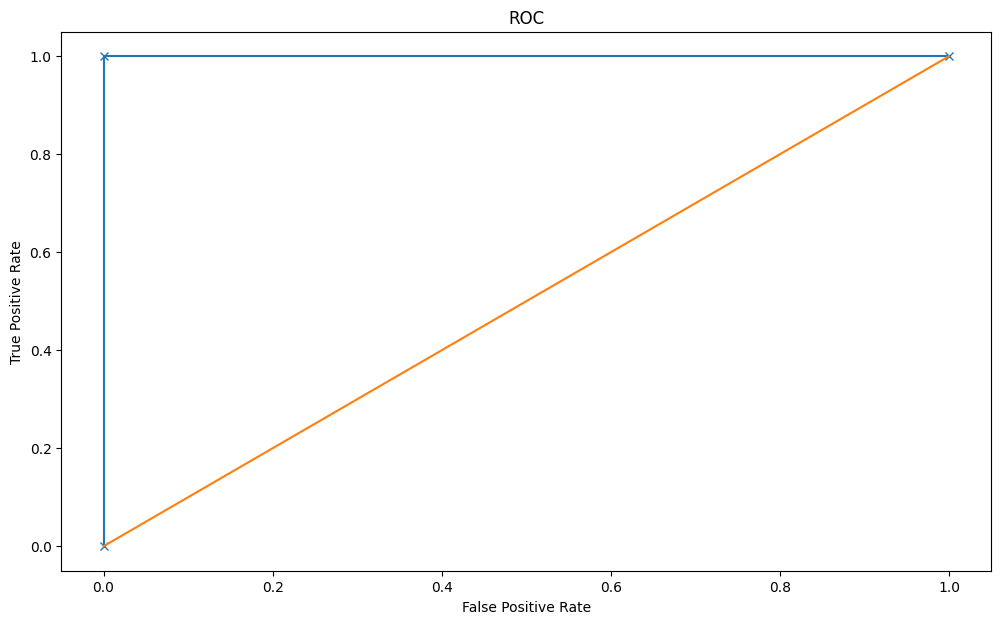

Area under Curve is 1.0


In [191]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,best_grid.predict_proba(X_train)[:,1]))

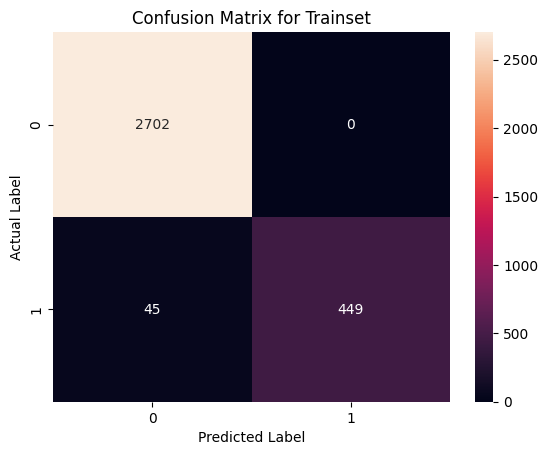

In [192]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,RF_test_predict)
sns.heatmap(confusion_matrix(Y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [193]:
print(classification_report(Y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.91      0.95       494

    accuracy                           0.99      3196
   macro avg       0.99      0.95      0.97      3196
weighted avg       0.99      0.99      0.99      3196



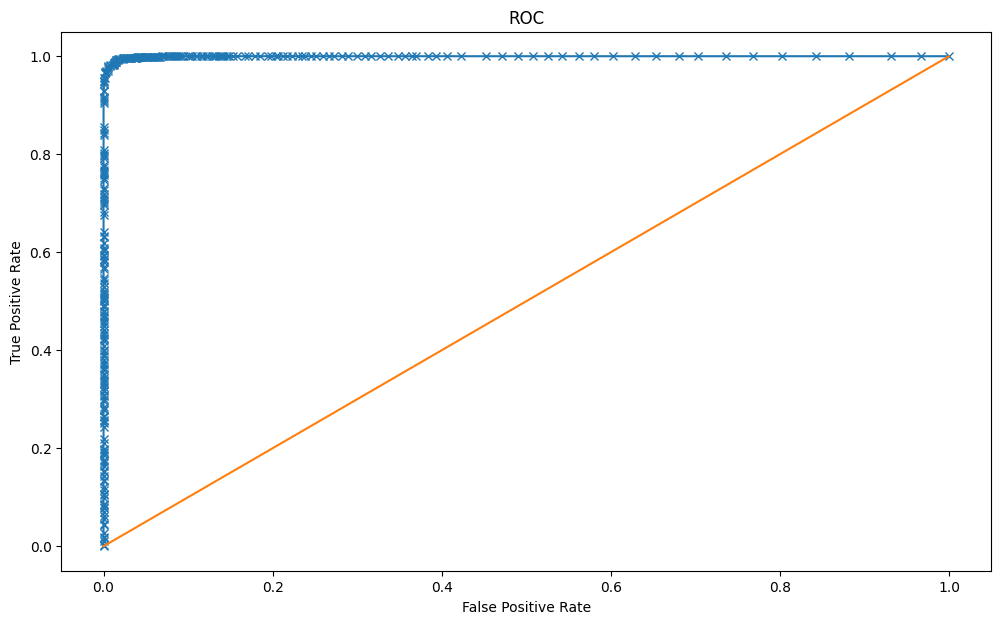

Area under Curve is 0.9994628360458739


In [194]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.02567
Feature: 1, Score: 0.11498
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.14344
Feature: 4, Score: 0.05896
Feature: 5, Score: 0.04696
Feature: 6, Score: 0.04174
Feature: 7, Score: 0.06491
Feature: 8, Score: 0.17241
Feature: 9, Score: 0.05760
Feature: 10, Score: 0.06335
Feature: 11, Score: 0.03257
Feature: 12, Score: 0.01443
Feature: 13, Score: 0.04475
Feature: 14, Score: 0.05350
Feature: 15, Score: 0.06472


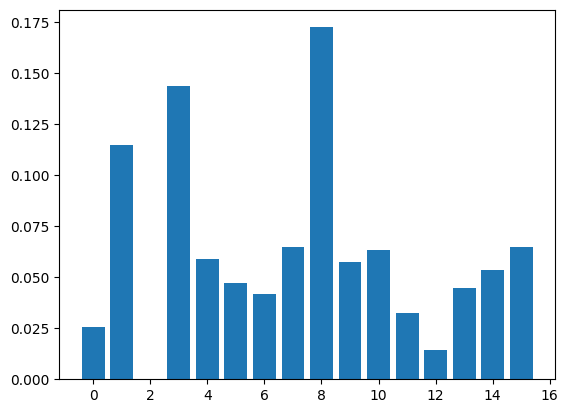

In [195]:
# get importance
importance = best_grid.feature_importances_
# to summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## **KNN**

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, Y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, Y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[0.763767209011264,
 0.7981852315394243,
 0.8204005006257822,
 0.8307259073842302,
 0.8344806007509387,
 0.8410513141426783,
 0.8413642052565707,
 0.8397997496871089,
 0.8426157697121401,
 0.8435544430538173]

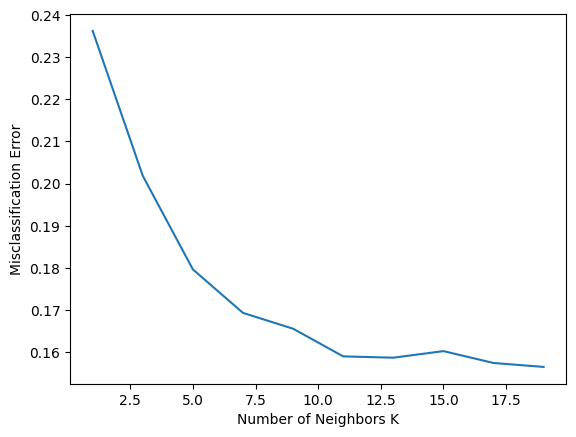

In [198]:
import matplotlib.pyplot as plt
# misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [199]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,Y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)

In [200]:
KNN_model.score(X_train,Y_train)

0.8819742489270386

In [201]:
KNN_model.score(X_test,Y_test)

0.7981852315394243

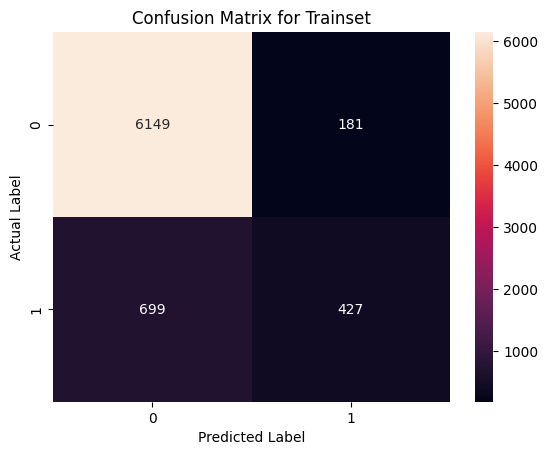

In [202]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(Y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [203]:
print(classification_report(Y_train,KNN_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6330
           1       0.70      0.38      0.49      1126

    accuracy                           0.88      7456
   macro avg       0.80      0.68      0.71      7456
weighted avg       0.87      0.88      0.87      7456



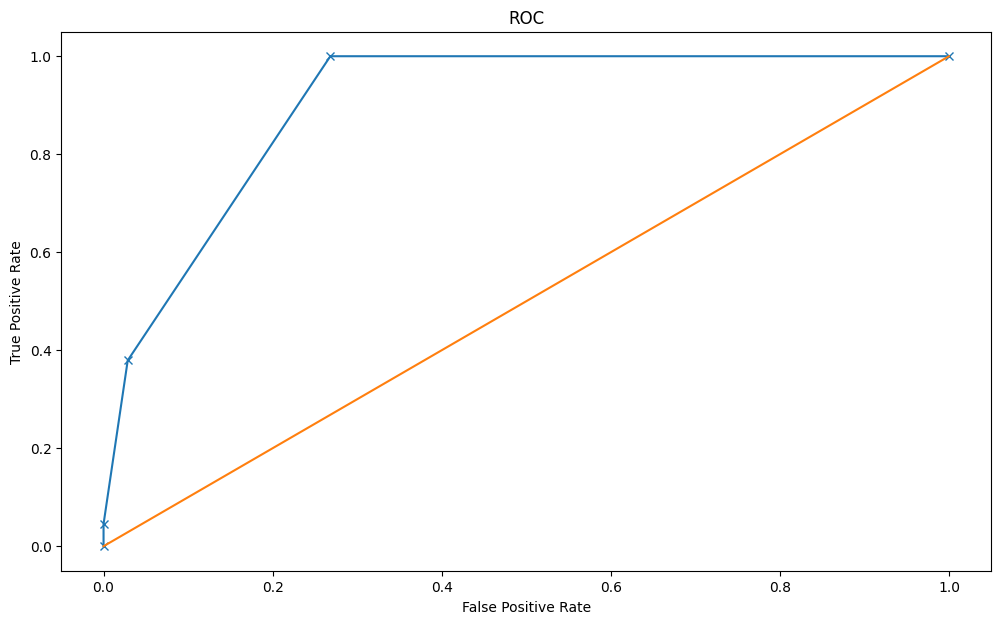

Area under Curve is 0.9030893374749915


In [204]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,KNN_model.predict_proba(X_train)[:,1]))

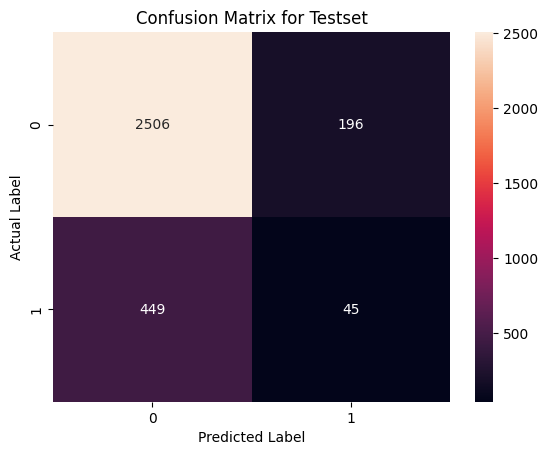

In [205]:
#Confusion Matrix for Train set
confusion_matrix(Y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(Y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')

plt.show()

In [206]:
print(classification_report(Y_test,KNN_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2702
           1       0.19      0.09      0.12       494

    accuracy                           0.80      3196
   macro avg       0.52      0.51      0.50      3196
weighted avg       0.75      0.80      0.77      3196



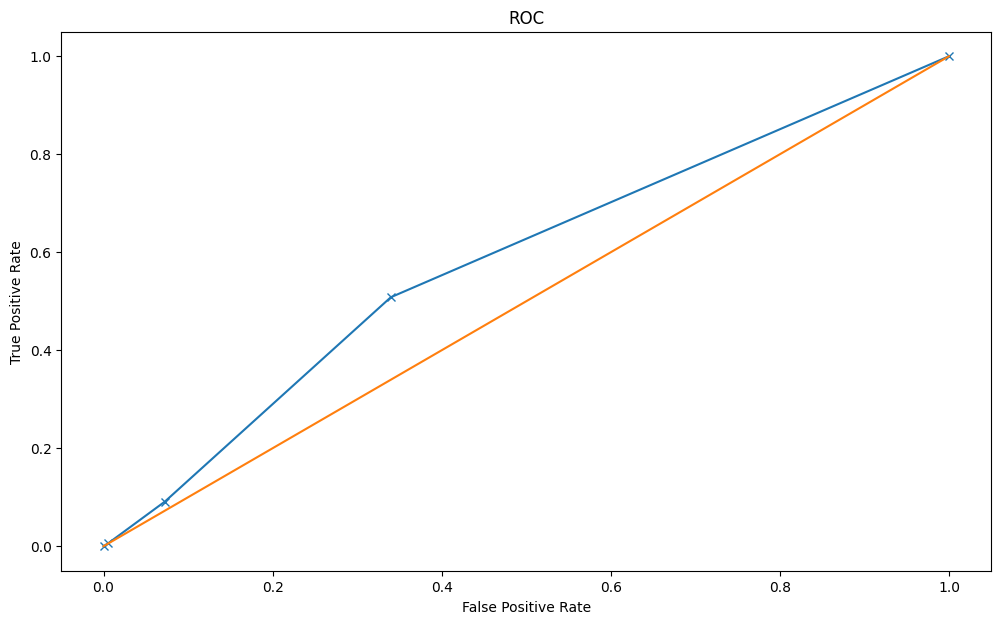

Area under Curve is 0.5811877991111697


In [207]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,KNN_model.predict_proba(X_test)[:,1]))

## **Logistic Regression**

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

In [210]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [211]:
log_model.score(X_train,Y_train)

0.8489806866952789

In [212]:
log_model.score(X_test,Y_test)

0.8454317897371715

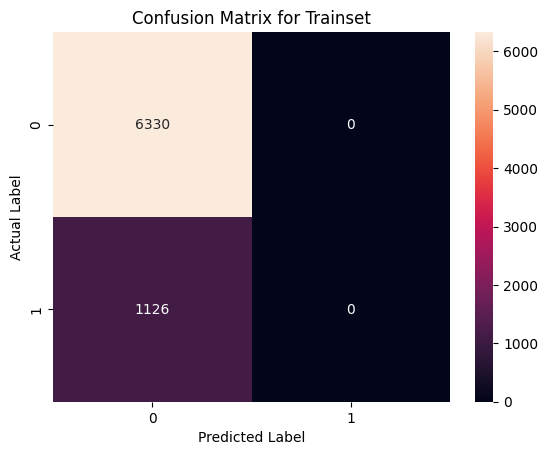

In [213]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,log_train_predict)
sns.heatmap(confusion_matrix(Y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [214]:
print(classification_report(Y_train,log_train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.42      0.50      0.46      7456
weighted avg       0.72      0.85      0.78      7456



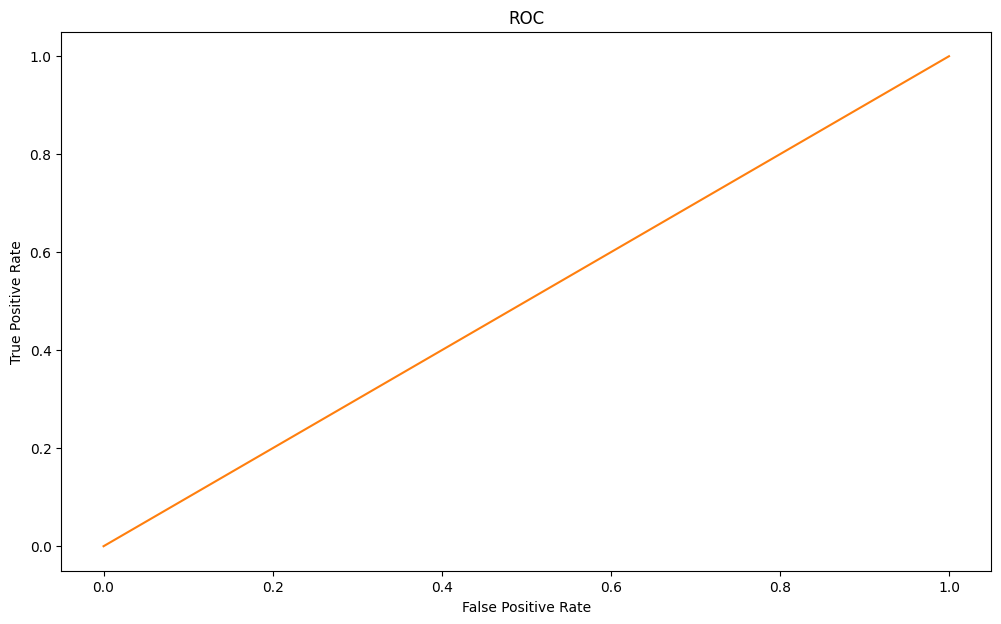

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [220]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

In [219]:
from sklearn.metrics import classification_report

print(classification_report(Y_train, log_train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.42      0.50      0.46      7456
weighted avg       0.72      0.85      0.78      7456



In [217]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_train, log_train_predict)
print('Accuracy:', accuracy)

Accuracy: 0.8489806866952789


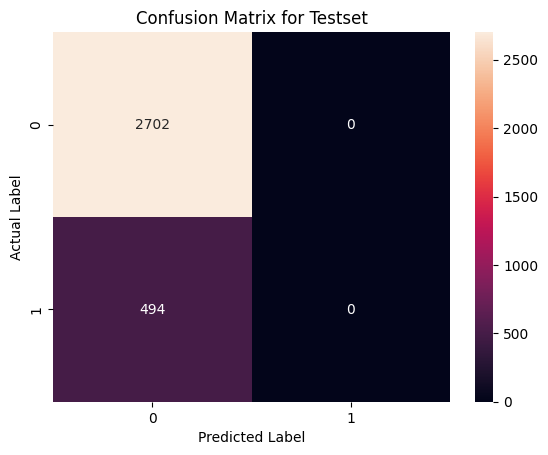

In [221]:
#Confusion Matrix for Train set
confusion_matrix(Y_test,log_test_predict)
sns.heatmap(confusion_matrix(Y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [222]:
print(classification_report(Y_test,log_test_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



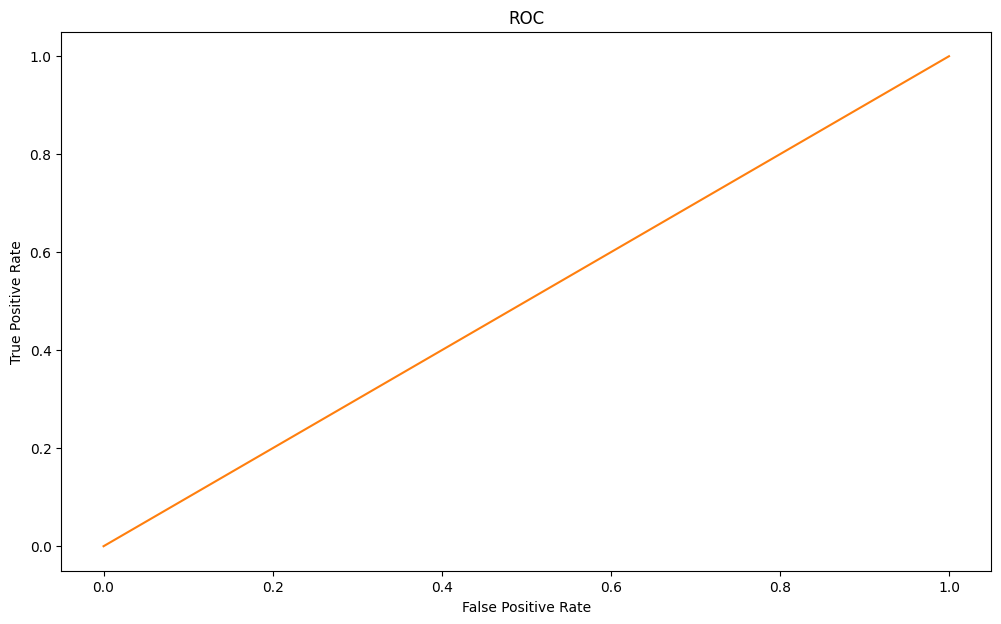

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [224]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [226]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [227]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [228]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-05)


In [229]:
best_model1 = grid_search1.best_estimator_

In [230]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

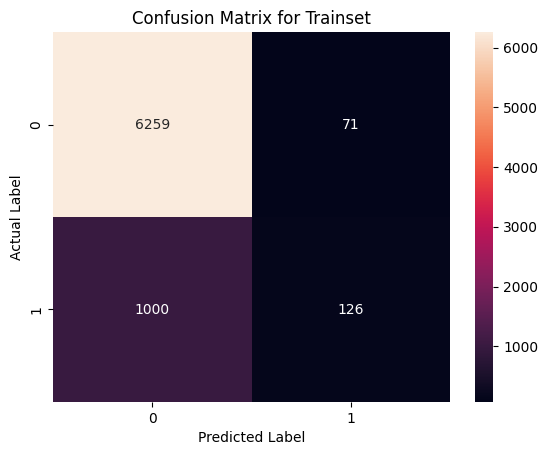

In [231]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,log_train_predict)
sns.heatmap(confusion_matrix(Y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [232]:
print(classification_report(Y_train,log_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.64      0.11      0.19      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.55      0.56      7456
weighted avg       0.83      0.86      0.81      7456



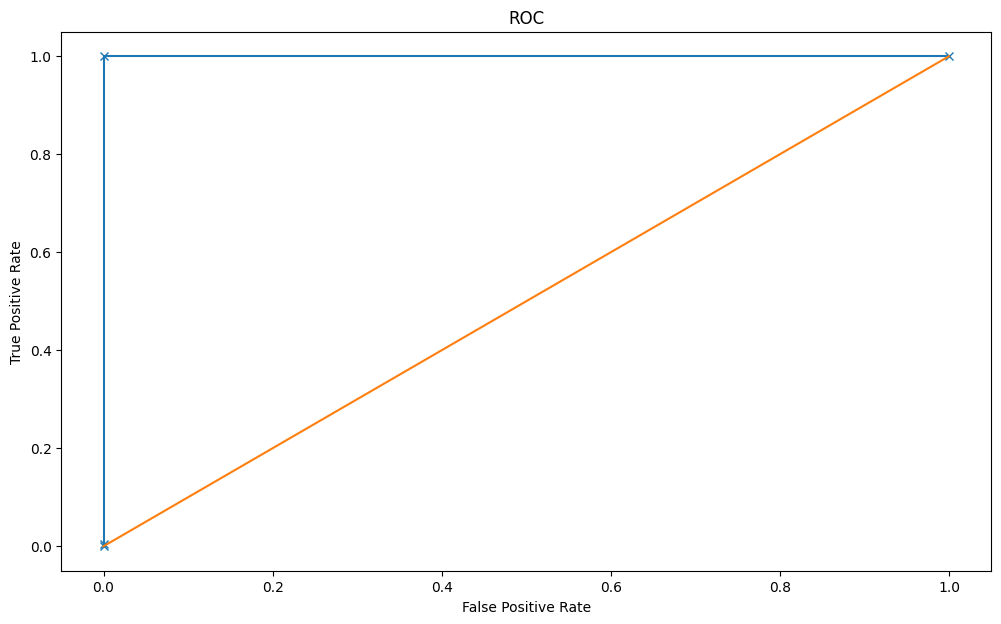

Area under Curve is 1.0


In [233]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

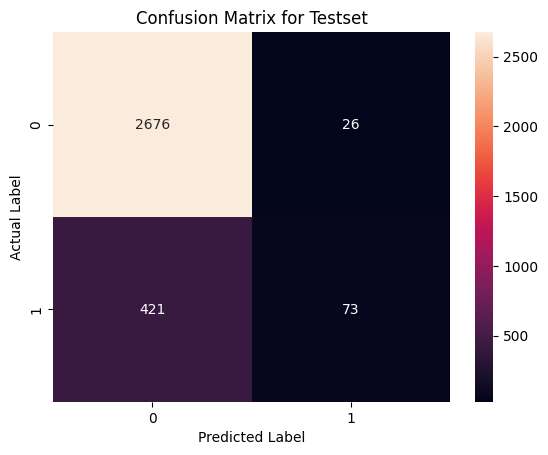

In [234]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,log_test_predict)
sns.heatmap(confusion_matrix(Y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [235]:
print(classification_report(Y_test,log_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.74      0.15      0.25       494

    accuracy                           0.86      3196
   macro avg       0.80      0.57      0.58      3196
weighted avg       0.84      0.86      0.82      3196



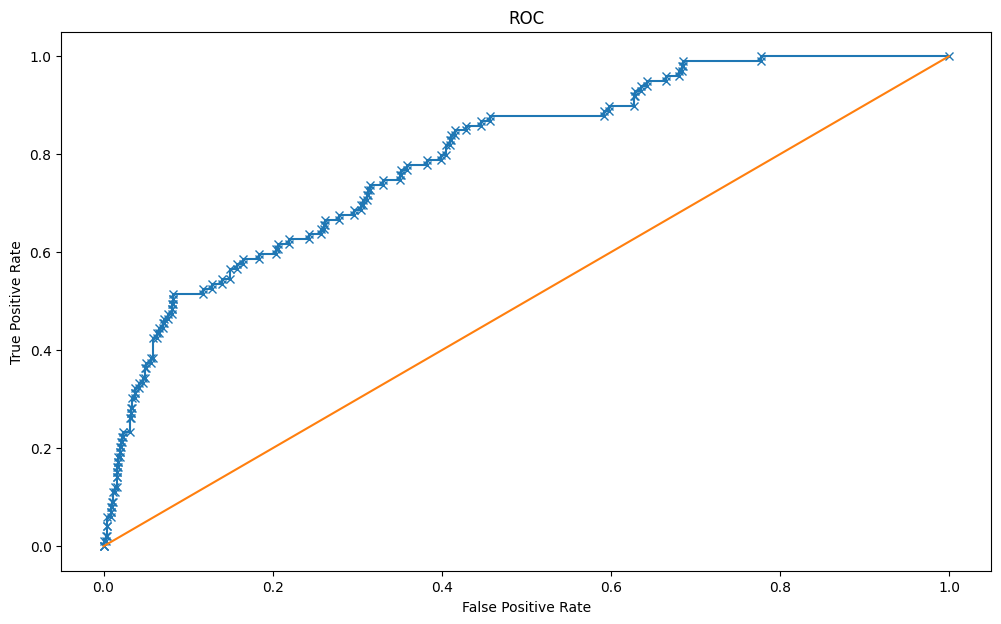

Area under Curve is 0.7964631787686357


In [236]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00474
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00001
Feature: 4, Score: 0.00429
Feature: 5, Score: 0.01676
Feature: 6, Score: 0.02081
Feature: 7, Score: -0.00221
Feature: 8, Score: -0.00009
Feature: 9, Score: 0.14539
Feature: 10, Score: 1.36208
Feature: 11, Score: 0.00017
Feature: 12, Score: -0.01444
Feature: 13, Score: -0.17718
Feature: 14, Score: -0.53031
Feature: 15, Score: -0.01396


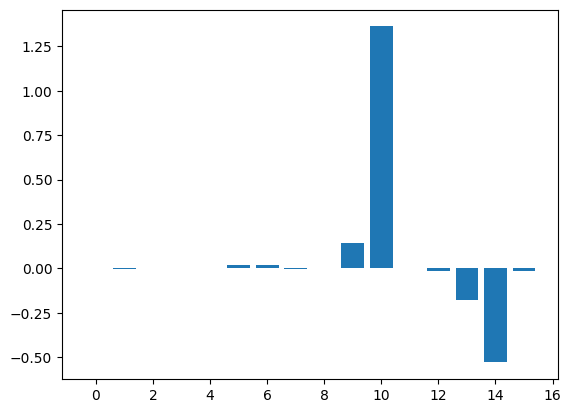

In [237]:
# get importance
importance = best_model1.coef_[0]
# to summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## **LDA**

In [238]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, Y_train)
lda_model

LinearDiscriminantAnalysis()

In [239]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [240]:
lda_model.score(X_train,Y_train)

0.8585032188841202

In [241]:
lda_model.score(X_test,Y_test)

0.8598247809762203

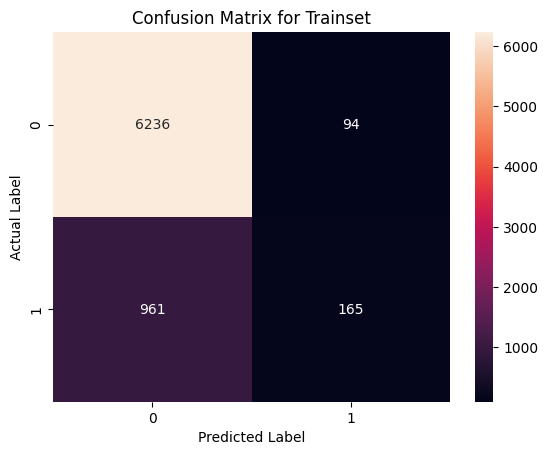

In [242]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,lda_train_predict)
sns.heatmap(confusion_matrix(Y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [243]:
print(classification_report(Y_train,lda_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6330
           1       0.64      0.15      0.24      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.57      0.58      7456
weighted avg       0.83      0.86      0.82      7456



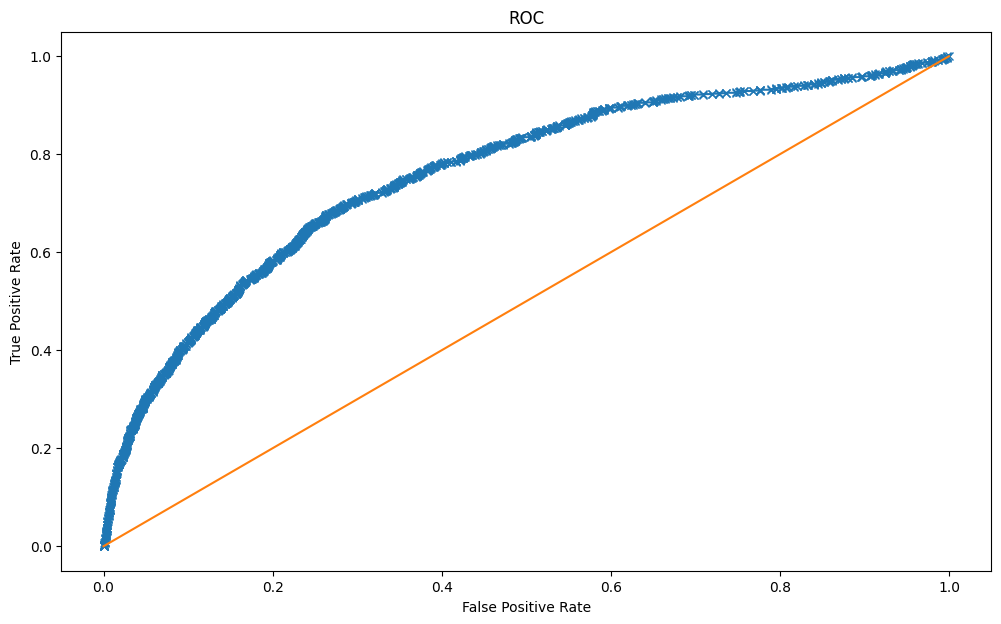

Area under Curve is 0.7600098490651807


In [244]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,lda_model.predict_proba(X_train)[:,1]))

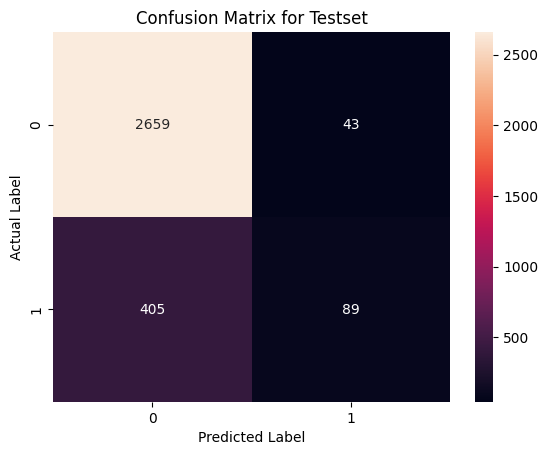

In [245]:
#Confusion Matrix for Train set
confusion_matrix(Y_test,lda_test_predict)
sns.heatmap(confusion_matrix(Y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [246]:
print(classification_report(Y_test,lda_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.67      0.18      0.28       494

    accuracy                           0.86      3196
   macro avg       0.77      0.58      0.60      3196
weighted avg       0.84      0.86      0.82      3196



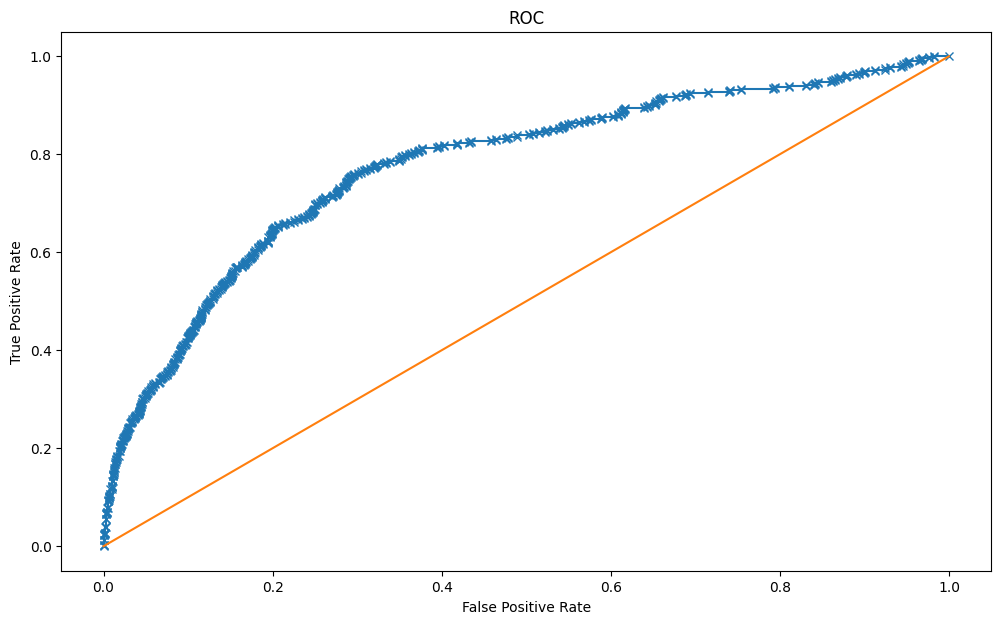

Area under Curve is 0.7768169926610068


In [247]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,lda_model.predict_proba(X_test)[:,1]))

In [248]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [249]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [250]:
grid_search2.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [251]:
lda_model.score(X_test,Y_test)

0.8598247809762203

In [252]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [253]:
best_model2 = grid_search2.best_estimator_

In [254]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

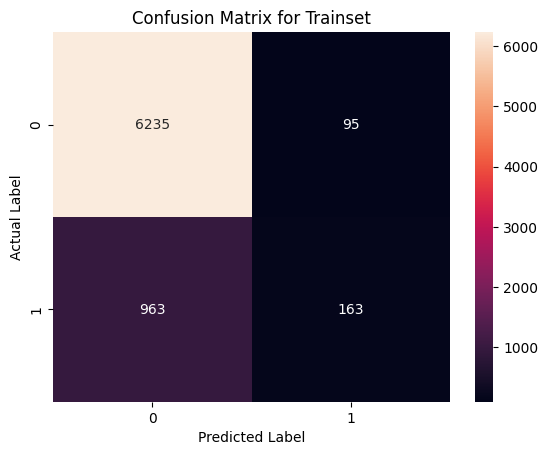

In [255]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,lda_train_predict)
sns.heatmap(confusion_matrix(Y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [256]:
print(classification_report(Y_train,lda_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6330
           1       0.63      0.14      0.24      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.56      0.58      7456
weighted avg       0.83      0.86      0.82      7456



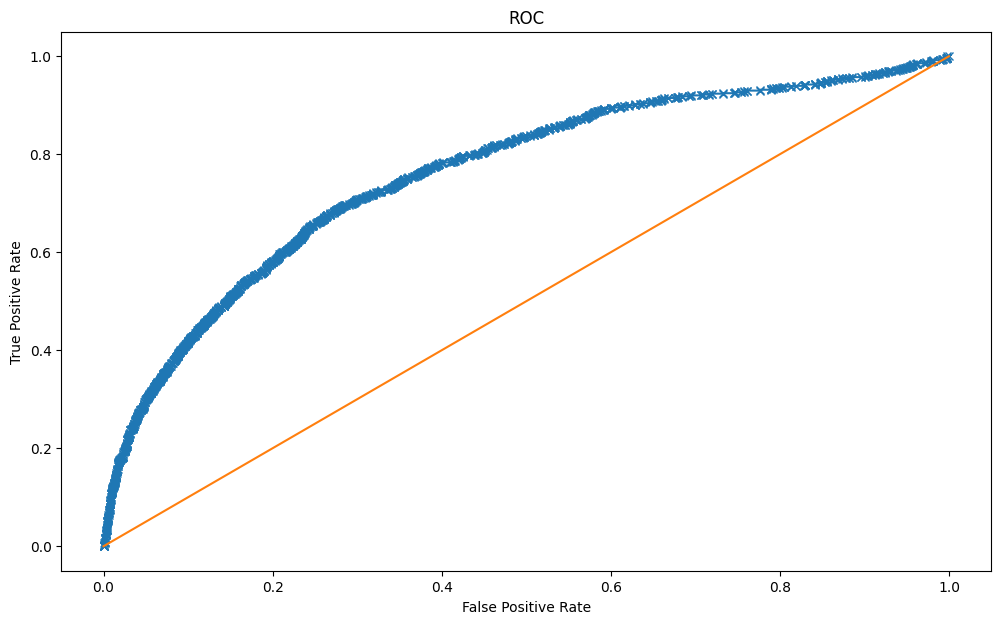

Area under Curve is 0.7601716150502698


In [257]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,best_model2.predict_proba(X_train)[:,1]))

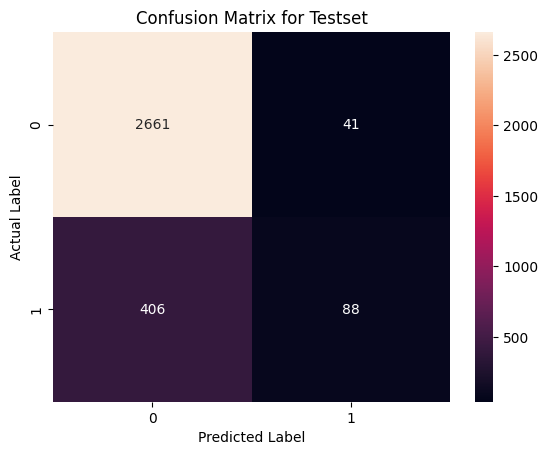

In [258]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,lda_test_predict)
sns.heatmap(confusion_matrix(Y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [259]:
print(classification_report(Y_test,lda_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.68      0.18      0.28       494

    accuracy                           0.86      3196
   macro avg       0.77      0.58      0.60      3196
weighted avg       0.84      0.86      0.82      3196



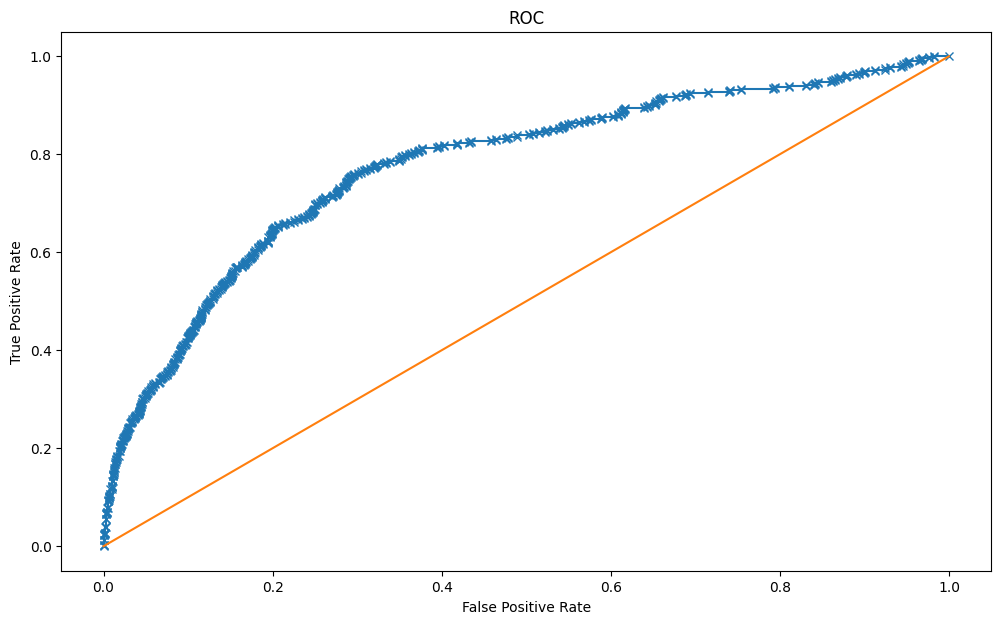

Area under Curve is 0.7768169926610068


In [260]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00003
Feature: 1, Score: -0.00535
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00001
Feature: 4, Score: 0.00902
Feature: 5, Score: 0.01156
Feature: 6, Score: 0.01737
Feature: 7, Score: -0.00056
Feature: 8, Score: -0.00006
Feature: 9, Score: 0.14620
Feature: 10, Score: 1.59398
Feature: 11, Score: 0.00039
Feature: 12, Score: 0.00509
Feature: 13, Score: -0.15666
Feature: 14, Score: -0.49845
Feature: 15, Score: -0.00656


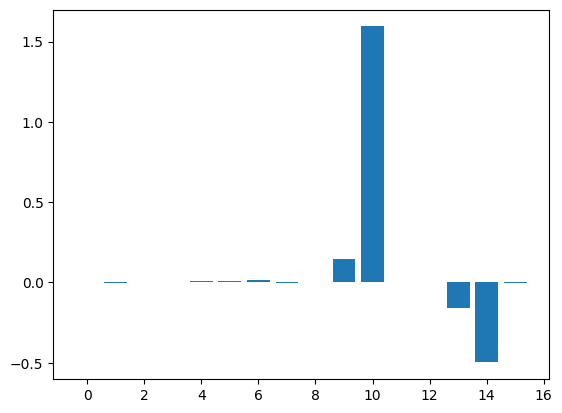

In [261]:
# get importance
importance = best_model2.coef_[0]
# to summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

**SMOTE**

In [262]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [263]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [264]:
X_train_res.shape

(12660, 16)

## **SMOTE on Logistic**

In [265]:
smote_log = LogisticRegression()
smote_log.fit(X_train_res, y_train_res)

LogisticRegression()

In [266]:
smote_log_train_predict = smote_log.predict(X_train_res)
smote_log_test_predict = smote_log.predict(X_test)

In [267]:
smote_log_train_predict = smote_log.predict(X_train_res)
model_score = smote_log.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.5957345971563981
[[2915 3415]
 [1703 4627]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      6330
           1       0.58      0.73      0.64      6330

    accuracy                           0.60     12660
   macro avg       0.60      0.60      0.59     12660
weighted avg       0.60      0.60      0.59     12660



In [268]:
smote_log_test_predict = smote_log.predict(X_test)
model_score = smote_log.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_log_test_predict))
print(metrics.classification_report(Y_test ,smote_log_test_predict))

0.49687108886107634
[[1235 1467]
 [ 141  353]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.61      2702
           1       0.19      0.71      0.31       494

    accuracy                           0.50      3196
   macro avg       0.55      0.59      0.46      3196
weighted avg       0.79      0.50      0.56      3196



## **SMOTE on LDA**

In [269]:
smote_lda = LinearDiscriminantAnalysis()
smote_lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [270]:
smote_lda_train_predict = smote_lda.predict(X_train_res)
smote_lda_test_predict = smote_lda.predict(X_test)

In [271]:
smote_lda_train_predict = smote_lda.predict(X_train_res)
model_score = smote_log.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.5957345971563981
[[4215 2115]
 [1501 4829]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      6330
           1       0.70      0.76      0.73      6330

    accuracy                           0.71     12660
   macro avg       0.72      0.71      0.71     12660
weighted avg       0.72      0.71      0.71     12660



In [272]:
smote_log_test_predict = smote_lda.predict(X_test)
model_score = smote_lda.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_lda_test_predict))
print(metrics.classification_report(Y_test ,smote_lda_test_predict))

0.6670838548185232
[[1791  911]
 [ 153  341]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      2702
           1       0.27      0.69      0.39       494

    accuracy                           0.67      3196
   macro avg       0.60      0.68      0.58      3196
weighted avg       0.82      0.67      0.71      3196



## **SMOTE on KNN**

In [273]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [274]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [275]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9016587677725119
[[5246 1084]
 [ 161 6169]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6330
           1       0.85      0.97      0.91      6330

    accuracy                           0.90     12660
   macro avg       0.91      0.90      0.90     12660
weighted avg       0.91      0.90      0.90     12660



In [276]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_log_test_predict))
print(metrics.classification_report(Y_test ,smote_log_test_predict))

0.6611389236545682
[[1898  804]
 [ 279  215]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      2702
           1       0.21      0.44      0.28       494

    accuracy                           0.66      3196
   macro avg       0.54      0.57      0.53      3196
weighted avg       0.77      0.66      0.70      3196



## **SMOTE on Random Forest**

In [277]:
Smote_RF=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF=Smote_RF.fit(X_train_res, y_train_res)

In [278]:
Smote_RF_train_predict = Smote_RF.predict(X_train_res)
Smote_RF_test_predict = Smote_RF.predict(X_test)

In [282]:
Smote_RF_train_predict = Smote_RF.predict(X_train_res)
model_score = Smote_RF.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res, Smote_RF_train_predict))

1.0
[[6330    0]
 [   0 6330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      6330

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



In [281]:
Smote_RF_test_predict = Smote_RF.predict(X_test)
model_score = Smote_RF.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Smote_RF_test_predict))
print(metrics.classification_report(Y_test ,Smote_RF_test_predict))

0.9730913642052565
[[2647   55]
 [  31  463]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2702
           1       0.89      0.94      0.92       494

    accuracy                           0.97      3196
   macro avg       0.94      0.96      0.95      3196
weighted avg       0.97      0.97      0.97      3196

